In [2]:
# Uses code from 'make j from scratch'
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
def multiplicative_order(d,n):
    for k in [0..n]:
        if (mod(n,d^k)==0)&(mod(n,d*d^k)!=0):return k
    return -1
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNew(n,m):
    def xjNewStep(n,m):
        f=J(n,m)
        fl=f.list()
        rt=0
        for i in [0..len(fl)-1]:
            rt=rt+fl[i]*x**i*(m**3*2**6)**i
        return rt
    return xjNewStep(n-1,m)
def j(n,m):return L(xjNew(n,m)/x)


    

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def leadingCoefficient(polynomial):
    dg=polynomial.degree()
    return polynomialCoefficient(dg,polynomial)
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def firstfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.first())
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def sigmaOdd(n):
    sum=0
    dvs=divisors(n)
    lnth=len(dvs)
    for k in [0..lnth-1]:
        dv=dvs[k]
        if mod(dv,2)==1:
            sum=sum+dv
    return sum

def division(dividend, divisor) : 
    quotient=(dividend._maxima_().divide(divisor).sage())[0] 
    remainder=(dividend._maxima_().divide(divisor).sage())[1] 
    return (quotient,remainder)

def HsubI(n,m):
    jay = J(n+2,m)
    numerator = x^m*derivative(jay,x)^m
    denominator = jay^(m-1)*(jay-1)
    power=1/(m-2)
    return -L((numerator/denominator)^power).truncate(n+1)

def HsubItoMminus2(n,m):
    jay = J(n+2,m)
    numerator = x^m*derivative(jay,x)^m
    denominator = jay^(m-1)*(jay-1)
    return (-1)^m*L((numerator/denominator)).truncate(n+1)

def HsubItoMminus2Strike(n,m):
    answer=HsubItoMminus2(n,m)
    al=answer.list()
    dg=answer.degree()
    sm=sum(al[k]*(2^6*m^3*x)^k for k in [0..dg])*(-1)^m
    return sm*(-1)^m

def H6(n,m):
    def base6(n,m):
        jay=J(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(jay-1))
        return L((-1)^m*(num/den)).O(n+1)
    answer=S(base6(n,m)^(1/(m-2)))
    return answer.polynomial()
     #if argument is an S type then 'polynomial' takes no argument.
    
def H6strike(n,m): 
    poly=H6(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer

def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel

print("ok1")

ok1


In [2]:
poly=D(H6(5,3))
print(poly)
print(polynomialCoefficient(5,poly))

-3647/35664401793024*x^5 - 7399/123834728448*x^4 - 427/17915904*x^3 - 77/13824*x^2 - 7/24*x + 1
-3647/35664401793024


In [3]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [4]:
print(HsubI(5,3))

1 - 7/24*x - 77/13824*x^2 - 427/17915904*x^3 - 7399/123834728448*x^4 - 3647/35664401793024*x^5


In [5]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [7]:
print(HsubItoMminus2(5,3))

1 - 7/24*x - 77/13824*x^2 - 427/17915904*x^3 - 7399/123834728448*x^4 - 3647/35664401793024*x^5


In [12]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [13]:
print(HsubItoMminus2Strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [14]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [15]:
poly=H6strike(5,3)
print(poly)
for k in [1..5]:
    print([k,polynomialCoefficient(k,poly),-504*sigma(k,5)])

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1
[1, -504, -504]
[2, -16632, -16632]
[3, -122976, -122976]
[4, -532728, -532728]
[5, -1575504, -1575504]


In [16]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [17]:
poly=H6strike(100,3)
data=[]
for k in [1..100]:
    test=polynomialCoefficient(k,poly)+504*sigma(k,5)
    data=data+[test]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [19]:
poly=HsubItoMminus2Strike(100,3)
data=[]
for k in [1..99]:
    test=polynomialCoefficient(k,poly)+504*sigma(k,5)
    data=data+[test]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [21]:
import pickle
import time
wfile=open('/Users/barrybrent/1oct22test1.txt','wb')
data=[]
n=5
start=time.time()/60
for m in [3..13]:
    poly=HsubItoMminus2Strike(n,m)
    data=data+[[m,poly]]
    finish=time.time()/60
    print([m,poly.degree(),finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 5, 0.0018039308488368988]
[4, 5, 0.0026747137308120728]
[5, 5, 0.00445779412984848]
[6, 5, 0.0057893358170986176]
[7, 5, 0.0076646506786346436]
[8, 5, 0.00851859524846077]
[9, 5, 0.010328046977519989]
[10, 5, 0.011848483234643936]
[11, 5, 0.013537567108869553]
[12, 5, 0.014909699559211731]
[13, 5, 0.016832750290632248]


In [22]:
print(H6strike(5,3))

-1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1


In [23]:
import pickle
rfile=open('/Users/barrybrent/1oct22test1.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print(s[k])
    print("========================================================================")

[3, -1575504*x^5 - 532728*x^4 - 122976*x^3 - 16632*x^2 - 504*x + 1]
[4, 2354514493440*x^5 + 33585889280*x^4 + 243793920*x^3 + 1433600*x^2 - 2560*x + 1]
[5, -2485385589570000*x^5 - 5340592725000*x^4 - 12376780000*x^3 + 19227000*x^2 - 7800*x + 1]
[6, 180822383769157632*x^5 + 258851236478976*x^4 - 344570462208*x^3 + 123863040*x^2 - 18432*x + 1]


In [2]:
import pickle
import time
wfile=open('/Users/barrybrent/1oct22no2.txt','wb')
data=[]
n=200
start=time.time()/60
for m in [3..4803]:
    poly=HsubItoMminus2Strike(n,m)
    data=data+[[m,poly]]
    finish=time.time()/60
    print([m,poly.degree(),finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 200, 0.26817093789577484]
[4, 200, 0.44466428831219673]
[5, 200, 0.799598217010498]
[6, 200, 0.9637343361973763]
[7, 200, 1.3524324670433998]
[8, 200, 1.649145171046257]
[9, 200, 2.0735360011458397]
[10, 200, 2.3416510187089443]
[11, 200, 2.7643526196479797]
[12, 200, 3.1298411525785923]
[13, 200, 3.5887201204895973]
[14, 200, 3.882472585886717]
[15, 200, 4.3860130198299885]
[16, 200, 4.740544971078634]
[17, 200, 5.238439187407494]
[18, 200, 5.590595304965973]
[19, 200, 6.077235821634531]
[20, 200, 6.498871501535177]
[21, 200, 7.026207186281681]
[22, 200, 7.344377338886261]
[23, 200, 7.8234830014407635]
[24, 200, 8.262528017163277]
[25, 200, 8.781918618828058]
[26, 200, 9.13970373943448]
[27, 200, 9.667314887046814]
[28, 200, 10.118561066687107]
[29, 200, 10.637174967676401]
[30, 200, 11.031964685767889]
[31, 200, 11.533065784722567]
[32, 200, 11.949133805930614]
[33, 200, 12.528268650174141]
[34, 200, 12.901423335075378]
[35, 200, 13.492866102606058]
[36, 200, 13.980320516973734]


[276, 200, 162.41140611842275]
[277, 200, 163.10808468610048]
[278, 200, 163.6526629179716]
[279, 200, 164.40506801754236]
[280, 200, 165.1034238860011]
[281, 200, 165.80482498556376]
[282, 200, 166.3946021683514]
[283, 200, 167.11300459876657]
[284, 200, 167.75705150142312]
[285, 200, 168.5608278401196]
[286, 200, 169.1272631175816]
[287, 200, 169.8874540515244]
[288, 200, 170.53440410271287]
[289, 200, 171.28344245254993]
[290, 200, 171.86722096800804]
[291, 200, 172.62198006734252]
[292, 200, 173.2456490881741]
[293, 200, 173.96609462052584]
[294, 200, 174.56961323693395]
[295, 200, 175.3234004676342]
[296, 200, 175.95874876528978]
[297, 200, 176.71967443451285]
[298, 200, 177.25721197202802]
[299, 200, 178.00489135086536]
[300, 200, 178.7153536863625]
[301, 200, 179.47169145196676]
[302, 200, 180.0049137659371]
[303, 200, 180.7711429335177]
[304, 200, 181.40830433368683]
[305, 200, 182.17332005128264]
[306, 200, 182.76371013745666]
[307, 200, 183.49732271581888]
[308, 200, 184.1917

[545, 200, 354.4123878031969]
[546, 200, 355.086078453809]
[547, 200, 355.8410097397864]
[548, 200, 356.5571087822318]
[549, 200, 357.3910170868039]
[550, 200, 358.0641559511423]
[551, 200, 358.86711463332176]
[552, 200, 359.60883811861277]
[553, 200, 360.41355261951685]
[554, 200, 361.0181457847357]
[555, 200, 361.88578057289124]
[556, 200, 362.5757218711078]
[557, 200, 363.3771017715335]
[558, 200, 364.0205089189112]
[559, 200, 364.8404308333993]
[560, 200, 365.58589955046773]
[561, 200, 366.4464310705662]
[562, 200, 367.05326135084033]
[563, 200, 367.82711570337415]
[564, 200, 368.58825439959764]
[565, 200, 369.4052342996001]
[566, 200, 370.0280059687793]
[567, 200, 370.888773586601]
[568, 200, 371.5964044034481]
[569, 200, 372.3451924882829]
[570, 200, 373.03558114916086]
[571, 200, 373.8099601380527]
[572, 200, 374.53910928964615]
[573, 200, 375.366238899529]
[574, 200, 376.00017485022545]
[575, 200, 376.84745686873794]
[576, 200, 377.56701048463583]
[577, 200, 378.35139766708016]

[817, 200, 562.6136489547789]
[818, 200, 563.2678926028311]
[819, 200, 564.1685929521918]
[820, 200, 564.9728755243123]
[821, 200, 565.7865795046091]
[822, 200, 566.4631373509765]
[823, 200, 567.2857658863068]
[824, 200, 568.0315838828683]
[825, 200, 568.9442522190511]
[826, 200, 569.6161264516413]
[827, 200, 570.4343858510256]
[828, 200, 571.2096460498869]
[829, 200, 572.0298167169094]
[830, 200, 572.6977553032339]
[831, 200, 573.5385630875826]
[832, 200, 574.2721166536212]
[833, 200, 575.1346989199519]
[834, 200, 575.8199748881161]
[835, 200, 576.653545435518]
[836, 200, 577.4407084174454]
[837, 200, 578.2952400371432]
[838, 200, 578.9474571868777]
[839, 200, 579.7441738843918]
[840, 200, 580.5897116847336]
[841, 200, 581.4007232189178]
[842, 200, 582.0191133208573]
[843, 200, 582.8729123026133]
[844, 200, 583.6005530878901]
[845, 200, 584.4838545508683]
[846, 200, 585.1632669530809]
[847, 200, 586.0325505211949]
[848, 200, 586.7421659342945]
[849, 200, 587.589639801532]
[850, 200, 5

[1089, 200, 781.5200798511505]
[1090, 200, 782.2400018014014]
[1091, 200, 783.0878150016069]
[1092, 200, 783.9429005682468]
[1093, 200, 784.7846782691777]
[1094, 200, 785.4382810853422]
[1095, 200, 786.3491640985012]
[1096, 200, 787.1034779027104]
[1097, 200, 787.9487376697361]
[1098, 200, 788.6550587527454]
[1099, 200, 789.5422418192029]
[1100, 200, 790.3722301982343]
[1101, 200, 791.2560341507196]
[1102, 200, 791.9220011718571]
[1103, 200, 792.7574587538838]
[1104, 200, 793.5607691891491]
[1105, 200, 794.4761571660638]
[1106, 200, 795.1827519387007]
[1107, 200, 796.0956951342523]
[1108, 200, 796.8838010020554]
[1109, 200, 797.7475635521114]
[1110, 200, 798.5074476525187]
[1111, 200, 799.3918485864997]
[1112, 200, 800.1642245315015]
[1113, 200, 801.135455083102]
[1114, 200, 801.8291202709079]
[1115, 200, 802.7470411546528]
[1116, 200, 803.5886133350432]
[1117, 200, 804.4605653174222]
[1118, 200, 805.1521468497813]
[1119, 200, 806.0277964510024]
[1120, 200, 806.8379461169243]
[1121, 20

[1355, 200, 1000.7438734024763]
[1356, 200, 1001.5663551203907]
[1357, 200, 1002.4593816399574]
[1358, 200, 1003.1909990683198]
[1359, 200, 1004.1100130528212]
[1360, 200, 1004.9529553055763]
[1361, 200, 1005.8263259194791]
[1362, 200, 1006.5699155032635]
[1363, 200, 1007.4682445526123]
[1364, 200, 1008.281378351152]
[1365, 200, 1009.2768865227699]
[1366, 200, 1009.9385155513883]
[1367, 200, 1010.832257270813]
[1368, 200, 1011.658854033798]
[1369, 200, 1012.536157656461]
[1370, 200, 1013.2595976032317]
[1371, 200, 1014.1613259352744]
[1372, 200, 1014.973489601165]
[1373, 200, 1015.8281052336097]
[1374, 200, 1016.5576272010803]
[1375, 200, 1017.4610336013138]
[1376, 200, 1018.2451482191682]
[1377, 200, 1019.1619494333863]
[1378, 200, 1019.8548682667315]
[1379, 200, 1020.7437492012978]
[1380, 200, 1021.6234382688999]
[1381, 200, 1022.4832665212452]
[1382, 200, 1023.1720095835626]
[1383, 200, 1024.0930156037211]
[1384, 200, 1024.8831357210875]
[1385, 200, 1025.80796020478]
[1386, 200, 102

[1613, 200, 1218.755863185972]
[1614, 200, 1219.5003123357892]
[1615, 200, 1220.4378588497639]
[1616, 200, 1221.231221318245]
[1617, 200, 1222.219780948013]
[1618, 200, 1222.9324919842184]
[1619, 200, 1223.8086281009018]
[1620, 200, 1224.6816899999976]
[1621, 200, 1225.5752262547612]
[1622, 200, 1226.2572052553296]
[1623, 200, 1227.1814166381955]
[1624, 200, 1228.024173233658]
[1625, 200, 1228.9635284394026]
[1626, 200, 1229.7265576347709]
[1627, 200, 1230.6150434166193]
[1628, 200, 1231.4754776656628]
[1629, 200, 1232.3925368227065]
[1630, 200, 1233.1575408019125]
[1631, 200, 1234.058540403843]
[1632, 200, 1234.9142299890518]
[1633, 200, 1235.845082335174]
[1634, 200, 1236.6070279367268]
[1635, 200, 1237.5971848368645]
[1636, 200, 1238.387949038297]
[1637, 200, 1239.3055572845042]
[1638, 200, 1240.1059937812388]
[1639, 200, 1241.0404872372746]
[1640, 200, 1241.901237666607]
[1641, 200, 1242.8457365706563]
[1642, 200, 1243.5633947215974]
[1643, 200, 1244.4650844670832]
[1644, 200, 1245

[1872, 200, 1441.4983668215573]
[1873, 200, 1442.3885535039008]
[1874, 200, 1443.1008076518774]
[1875, 200, 1444.0876996554434]
[1876, 200, 1444.9533185511827]
[1877, 200, 1445.8474903181195]
[1878, 200, 1446.5907467193902]
[1879, 200, 1447.4798406995833]
[1880, 200, 1448.3505826033652]
[1881, 200, 1449.314439971]
[1882, 200, 1450.0590017400682]
[1883, 200, 1450.9979701675475]
[1884, 200, 1451.8766491375864]
[1885, 200, 1452.8419444039464]
[1886, 200, 1453.5866593196988]
[1887, 200, 1454.5664149522781]
[1888, 200, 1455.374784566462]
[1889, 200, 1456.3061926029623]
[1890, 200, 1457.103453334421]
[1891, 200, 1458.0414097383618]
[1892, 200, 1458.8827080577612]
[1893, 200, 1459.8323543183506]
[1894, 200, 1460.543941669166]
[1895, 200, 1461.4793466217816]
[1896, 200, 1462.3328638710082]
[1897, 200, 1463.264037553221]
[1898, 200, 1464.0111626647413]
[1899, 200, 1464.9619029164314]
[1900, 200, 1465.8455583676696]
[1901, 200, 1466.75999686867]
[1902, 200, 1467.5091782212257]
[1903, 200, 1468.4

[2131, 200, 1667.7463564649224]
[2132, 200, 1668.6206023842096]
[2133, 200, 1669.5948355048895]
[2134, 200, 1670.4007324054837]
[2135, 200, 1671.4168009199202]
[2136, 200, 1672.3365846835077]
[2137, 200, 1673.2991130240262]
[2138, 200, 1674.066066518426]
[2139, 200, 1675.137616507709]
[2140, 200, 1676.079613789916]
[2141, 200, 1677.1342893354595]
[2142, 200, 1678.0261332541704]
[2143, 200, 1679.0572325065732]
[2144, 200, 1679.9959781356156]
[2145, 200, 1681.2083926536143]
[2146, 200, 1682.0657671168447]
[2147, 200, 1683.1496925018728]
[2148, 200, 1684.1495686732233]
[2149, 200, 1685.2579438351095]
[2150, 200, 1686.1618339195848]
[2151, 200, 1687.2955148518085]
[2152, 200, 1688.2593697868288]
[2153, 200, 1689.2825558371842]
[2154, 200, 1690.0480590164661]
[2155, 200, 1691.0071379505098]
[2156, 200, 1691.8831928670406]
[2157, 200, 1692.8474654853344]
[2158, 200, 1693.5957934185863]
[2159, 200, 1694.5473314523697]
[2160, 200, 1695.44127894938]
[2161, 200, 1696.372010383755]
[2162, 200, 16

[2390, 200, 1899.7066305205226]
[2391, 200, 1900.6891363337636]
[2392, 200, 1901.5615548826754]
[2393, 200, 1902.501606285572]
[2394, 200, 1903.3264865502715]
[2395, 200, 1904.2972379215062]
[2396, 200, 1905.1510515213013]
[2397, 200, 1906.1249487176538]
[2398, 200, 1906.861922621727]
[2399, 200, 1907.786480486393]
[2400, 200, 1908.6931380033493]
[2401, 200, 1909.6607617214322]
[2402, 200, 1910.4104228541255]
[2403, 200, 1911.3642017357051]
[2404, 200, 1912.2134762853384]
[2405, 200, 1913.1874545700848]
[2406, 200, 1913.9681800976396]
[2407, 200, 1914.904959935695]
[2408, 200, 1915.77991033718]
[2409, 200, 1916.7807653695345]
[2410, 200, 1917.54710175097]
[2411, 200, 1918.4970658011734]
[2412, 200, 1919.4080666005611]
[2413, 200, 1920.3794662691653]
[2414, 200, 1921.131494950503]
[2415, 200, 1922.1824668347836]
[2416, 200, 1923.0206314846873]
[2417, 200, 1923.9567062221467]
[2418, 200, 1924.7690449021757]
[2419, 200, 1925.6987486854196]
[2420, 200, 1926.608725734055]
[2421, 200, 1927.5

[2650, 200, 2135.0020495019853]
[2651, 200, 2135.961990967393]
[2652, 200, 2136.874366082251]
[2653, 200, 2137.837661202997]
[2654, 200, 2138.587750583887]
[2655, 200, 2139.6290061846375]
[2656, 200, 2140.4707595035434]
[2657, 200, 2141.4073133543134]
[2658, 200, 2142.2053901851177]
[2659, 200, 2143.1604578867555]
[2660, 200, 2144.094915650785]
[2661, 200, 2145.096478704363]
[2662, 200, 2145.861128654331]
[2663, 200, 2146.8275000043213]
[2664, 200, 2147.733294799924]
[2665, 200, 2148.7379808165133]
[2666, 200, 2149.5176206864417]
[2667, 200, 2150.5312090031803]
[2668, 200, 2151.4092780686915]
[2669, 200, 2152.347261734307]
[2670, 200, 2153.1818965524435]
[2671, 200, 2154.101296838373]
[2672, 200, 2154.9545196332037]
[2673, 200, 2155.9494823515415]
[2674, 200, 2156.7490750178695]
[2675, 200, 2157.7188798859715]
[2676, 200, 2158.6256066523492]
[2677, 200, 2159.5578618831933]
[2678, 200, 2160.329148519784]
[2679, 200, 2161.340940117836]
[2680, 200, 2162.2462651506066]
[2681, 200, 2163.220

[2911, 200, 2372.5306099541485]
[2912, 200, 2373.4155143015087]
[2913, 200, 2374.414098534733]
[2914, 200, 2375.1761469356716]
[2915, 200, 2376.1974343694746]
[2916, 200, 2377.115415737033]
[2917, 200, 2378.085562571883]
[2918, 200, 2378.8416906856]
[2919, 200, 2379.865641903132]
[2920, 200, 2380.762548800558]
[2921, 200, 2381.7032661885023]
[2922, 200, 2382.506705570966]
[2923, 200, 2383.4622858203948]
[2924, 200, 2384.3741039186716]
[2925, 200, 2385.429647754878]
[2926, 200, 2386.2679285369813]
[2927, 200, 2387.2015826031566]
[2928, 200, 2388.097581334412]
[2929, 200, 2389.0577855855227]
[2930, 200, 2389.865955237299]
[2931, 200, 2390.853565737605]
[2932, 200, 2391.750951834023]
[2933, 200, 2392.7632726170123]
[2934, 200, 2393.5686312541366]
[2935, 200, 2394.5842112340033]
[2936, 200, 2395.453089836985]
[2937, 200, 2396.46743908152]
[2938, 200, 2397.246854200959]
[2939, 200, 2398.203703235835]
[2940, 200, 2399.18271292001]
[2941, 200, 2400.141779869795]
[2942, 200, 2400.916002832353]

[3172, 200, 2612.426373384893]
[3173, 200, 2613.39473612234]
[3174, 200, 2614.2260214835405]
[3175, 200, 2615.2176232226193]
[3176, 200, 2616.0958253890276]
[3177, 200, 2617.0765709355474]
[3178, 200, 2617.8819936700165]
[3179, 200, 2618.8635470345616]
[3180, 200, 2619.8197914026678]
[3181, 200, 2620.7490295358]
[3182, 200, 2621.513136804104]
[3183, 200, 2622.496097739786]
[3184, 200, 2623.362749271095]
[3185, 200, 2624.406953584403]
[3186, 200, 2625.229424215853]
[3187, 200, 2626.192865870893]
[3188, 200, 2627.0659997686744]
[3189, 200, 2628.0720757879317]
[3190, 200, 2628.9112538844347]
[3191, 200, 2629.8679810352623]
[3192, 200, 2630.8280487172306]
[3193, 200, 2631.7930769212544]
[3194, 200, 2632.568460319191]
[3195, 200, 2633.6103354543447]
[3196, 200, 2634.5118983350694]
[3197, 200, 2635.462022356689]
[3198, 200, 2636.285521067679]
[3199, 200, 2637.275915503502]
[3200, 200, 2638.147823665291]
[3201, 200, 2639.1836623698473]
[3202, 200, 2639.953542318195]
[3203, 200, 2640.930863555

[3432, 200, 2854.989404488355]
[3433, 200, 2855.9459537491202]
[3434, 200, 2856.709742870182]
[3435, 200, 2857.7682201340795]
[3436, 200, 2858.6596163362265]
[3437, 200, 2859.676939584315]
[3438, 200, 2860.493599422276]
[3439, 200, 2861.5000709854066]
[3440, 200, 2862.4114710837603]
[3441, 200, 2863.4380246028304]
[3442, 200, 2864.230427287519]
[3443, 200, 2865.225472986698]
[3444, 200, 2866.1808430850506]
[3445, 200, 2867.2132043018937]
[3446, 200, 2867.9926254190505]
[3447, 200, 2869.00241035223]
[3448, 200, 2869.899470254779]
[3449, 200, 2870.8728269673884]
[3450, 200, 2871.7363593690097]
[3451, 200, 2872.7513428516686]
[3452, 200, 2873.6227175854146]
[3453, 200, 2874.632010754198]
[3454, 200, 2875.4284823834896]
[3455, 200, 2876.4595785178244]
[3456, 200, 2877.350333403796]
[3457, 200, 2878.3476554341614]
[3458, 200, 2879.197494484484]
[3459, 200, 2880.238301035017]
[3460, 200, 2881.1582691669464]
[3461, 200, 2882.129613623023]
[3462, 200, 2882.9541775025427]
[3463, 200, 2883.93307

[3693, 200, 3099.212789848447]
[3694, 200, 3099.9629643522203]
[3695, 200, 3100.9681025855243]
[3696, 200, 3101.923494171351]
[3697, 200, 3102.887056067586]
[3698, 200, 3103.6841361038387]
[3699, 200, 3104.7095192037523]
[3700, 200, 3105.658034402877]
[3701, 200, 3106.6312264353037]
[3702, 200, 3107.455316953361]
[3703, 200, 3108.4597652330995]
[3704, 200, 3109.3255611360073]
[3705, 200, 3110.396974518895]
[3706, 200, 3111.1794189736247]
[3707, 200, 3112.1961827017367]
[3708, 200, 3113.146284170449]
[3709, 200, 3114.131564285606]
[3710, 200, 3114.9886800684035]
[3711, 200, 3115.99882914871]
[3712, 200, 3116.861117169261]
[3713, 200, 3117.8556341156363]
[3714, 200, 3118.6697675846517]
[3715, 200, 3119.66184078902]
[3716, 200, 3120.5513916164637]
[3717, 200, 3121.6112857833505]
[3718, 200, 3122.4268044009805]
[3719, 200, 3123.3945305533707]
[3720, 200, 3124.348806452006]
[3721, 200, 3125.2968234345317]
[3722, 200, 3126.0516760386527]
[3723, 200, 3127.0889603346586]
[3724, 200, 3128.01708

[3954, 200, 3344.1898977831006]
[3955, 200, 3345.2357615716755]
[3956, 200, 3346.1439904533327]
[3957, 200, 3347.1679452843964]
[3958, 200, 3347.9602686688304]
[3959, 200, 3348.982821535319]
[3960, 200, 3349.987201064825]
[3961, 200, 3350.988790951669]
[3962, 200, 3351.814732953906]
[3963, 200, 3352.838097922504]
[3964, 200, 3353.745525151491]
[3965, 200, 3354.7695897370577]
[3966, 200, 3355.5893368199468]
[3967, 200, 3356.5527033358812]
[3968, 200, 3357.422437969595]
[3969, 200, 3358.46134711802]
[3970, 200, 3359.300941683352]
[3971, 200, 3360.2936107181013]
[3972, 200, 3361.2242252491415]
[3973, 200, 3362.178590334952]
[3974, 200, 3362.9691147729754]
[3975, 200, 3364.0140594504774]
[3976, 200, 3364.9337862730026]
[3977, 200, 3365.906935237348]
[3978, 200, 3366.7795934528112]
[3979, 200, 3367.7804638706148]
[3980, 200, 3368.709892101586]
[3981, 200, 3369.7166709005833]
[3982, 200, 3370.544612772763]
[3983, 200, 3371.5556124337018]
[3984, 200, 3372.4955020844936]
[3985, 200, 3373.51014

[4215, 200, 3591.5470415838063]
[4216, 200, 3592.461445387453]
[4217, 200, 3593.442245621234]
[4218, 200, 3594.2944603338838]
[4219, 200, 3595.266253001988]
[4220, 200, 3596.2044307664037]
[4221, 200, 3597.2555440180004]
[4222, 200, 3598.037325166166]
[4223, 200, 3598.997318636626]
[4224, 200, 3599.927717104554]
[4225, 200, 3600.964879386127]
[4226, 200, 3601.762070003897]
[4227, 200, 3602.7775697372854]
[4228, 200, 3603.7172706872225]
[4229, 200, 3604.6919056028128]
[4230, 200, 3605.57181474939]
[4231, 200, 3606.562731601298]
[4232, 200, 3607.471962336451]
[4233, 200, 3608.507020249963]
[4234, 200, 3609.325640436262]
[4235, 200, 3610.3977309390903]
[4236, 200, 3611.348610702902]
[4237, 200, 3612.337488669902]
[4238, 200, 3613.1632016673684]
[4239, 200, 3614.1913206353784]
[4240, 200, 3615.1255440711975]
[4241, 200, 3616.1093261539936]
[4242, 200, 3616.996183652431]
[4243, 200, 3617.991493988782]
[4244, 200, 3618.85532765463]
[4245, 200, 3619.930952284485]
[4246, 200, 3620.758256103843

[4476, 200, 3840.830992732197]
[4477, 200, 3841.8522304371]
[4478, 200, 3842.637901019305]
[4479, 200, 3843.669612940401]
[4480, 200, 3844.5907271020114]
[4481, 200, 3845.590476755053]
[4482, 200, 3846.4274971187115]
[4483, 200, 3847.4360368698835]
[4484, 200, 3848.3648253344]
[4485, 200, 3849.4727762676775]
[4486, 200, 3850.2817366346717]
[4487, 200, 3851.295277133584]
[4488, 200, 3852.287393204868]
[4489, 200, 3853.2789652869105]
[4490, 200, 3854.137166071683]
[4491, 200, 3855.1900486536324]
[4492, 200, 3856.1345818042755]
[4493, 200, 3857.127163220197]
[4494, 200, 3858.002278484404]
[4495, 200, 3859.0583049170673]
[4496, 200, 3859.9509515725076]
[4497, 200, 3860.990946404636]
[4498, 200, 3861.80347565189]
[4499, 200, 3862.8440789692104]
[4500, 200, 3863.843386620283]
[4501, 200, 3864.902806803584]
[4502, 200, 3865.6872015036643]
[4503, 200, 3866.7476992867887]
[4504, 200, 3867.6340098008513]
[4505, 200, 3868.6820182539523]
[4506, 200, 3869.511536054313]
[4507, 200, 3870.516740802675

[4736, 200, 4090.8002644889057]
[4737, 200, 4091.8485465347767]
[4738, 200, 4092.6745836511254]
[4739, 200, 4093.7001184523106]
[4740, 200, 4094.7095514051616]
[4741, 200, 4095.7326787039638]
[4742, 200, 4096.56328228116]
[4743, 200, 4097.646081767976]
[4744, 200, 4098.558803919703]
[4745, 200, 4099.611643034965]
[4746, 200, 4100.48594333604]
[4747, 200, 4101.475220635533]
[4748, 200, 4102.3903786838055]
[4749, 200, 4103.423882719129]
[4750, 200, 4104.272367887199]
[4751, 200, 4105.285784289241]
[4752, 200, 4106.248086549342]
[4753, 200, 4107.283338632435]
[4754, 200, 4108.08759875223]
[4755, 200, 4109.162904970348]
[4756, 200, 4110.070656839758]
[4757, 200, 4111.066679634154]
[4758, 200, 4111.952342033386]
[4759, 200, 4112.947893869132]
[4760, 200, 4113.957759920508]
[4761, 200, 4115.013676434755]
[4762, 200, 4115.851695615798]
[4763, 200, 4116.877206299454]
[4764, 200, 4117.845296673477]
[4765, 200, 4118.889004316181]
[4766, 200, 4119.7148745544255]
[4767, 200, 4120.794367585331]
[47

In [3]:
import pickle
import time
rfile=open('/Users/barrybrent/1oct22no2.txt','rb')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)


wfile = open('/Users/barrybrent/6oct22.txt','wb') 
#HsubItoMminus2Strike polynomials
polydata=[]
start=time.time()/60
for n in [0..200]:
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1])
        cf=polynomialCoefficient(n,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    poly=rl.polynomial(x)
    polydata=polydata+[[n,poly]] 
    finish=time.time()/60
    print(n,poly.degree(),finish-start)
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

0 0 1.8141866140067577
1 4 3.597190696746111
2 8 5.373611815273762
3 12 7.155230145901442
4 16 8.94145704805851
5 20 10.722475461661816
6 24 12.51480919867754
7 28 14.286987397819757
8 32 16.078138027340174
9 36 17.863104611635208
10 40 19.649162717163563
11 44 21.427071910351515
12 48 23.218540761619806
13 52 25.000956680625677
14 56 26.787456035614014
15 60 28.571393631398678
16 64 30.350338246673346
17 68 32.13957892730832
18 72 33.93322341144085
19 76 35.7143904492259
20 80 37.50576404482126
21 84 39.29741324856877
22 88 41.09422227740288
23 92 42.88225859776139
24 96 44.67973741516471
25 100 46.46437309682369
26 104 48.25744603201747
27 108 50.04498479515314
28 112 51.84150956571102
29 116 53.634660828858614
30 120 55.43042441084981
31 124 57.227162811905146
32 128 59.034110862761736
33 132 60.826809249818325
34 136 62.62977763265371
35 140 64.4336919337511
36 144 66.2395646944642
37 148 68.06478479504585
38 152 69.86909125000238
39 156 71.68292687833309
40 160 73.481814712286
41 

In [2]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
len(s)

201

In [5]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    n=s[k][0]
    poly=D(s[k][1])
    print("====================================================================================")
    print ((k,n))
    print 
    print (poly)
    print
    print (poly.factor())
    print(numericalfactor(poly))

(0, 0)
1
1
1
(1, 1)
-24*x^4 + 64*x^3 - 32*x^2
(-24) * (x - 2) * (x - 2/3) * x^2
-24
(2, 2)
288*x^8 - 1800*x^7 + 3328*x^6 - 1216*x^5 - 1536*x^4 + 896*x^3
(288) * (x - 2) * (x - 2/3) * (x + 2/3) * x^3 * (x^2 - 17/4*x + 7/2)
288
(3, 3)
-2304*x^12 + 24768*x^11 - 91680*x^10 + 122368*x^9 + 217984/9*x^8 - 177152*x^7 + 752128/9*x^6 + 49152*x^5 - 284672/9*x^4
(-2304) * (x - 2) * (x - 2/3) * x^4 * (x^6 - 97/12*x^5 + 1217/72*x^4 + 74/27*x^3 - 695/27*x^2 + 124/27*x + 278/27)
-2304


In [57]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    n=s[k][0]
    poly=D(s[k][1])
    print("====================================================================================")
    print ((k,n))
    print 
    print (poly)
    print
    print (poly.factor())

n:  0

1
1
n:  1

(-24) * (x - 2/3) * x^2
-24
n:  2

(24) * (x - 14) * (x - 2) * (x - 2/3) * x^3
24
n:  3

(-96) * (x - 2) * (x - 2/3) * x^4 * (x^3 - 50/9*x^2 + 460/9*x - 1112/9)
-96
n:  4

(24) * (x - 2) * (x - 2/3) * x^5 * (x^5 - 298/3*x^4 + 19208/27*x^3 - 90992/27*x^2 + 343600/27*x - 520864/27)
24
n:  5

(-144) * (x - 2) * (x - 2/3) * x^6 * (x^7 - 766/45*x^6 + 633908/2025*x^5 - 5608696/2025*x^4 + 26620592/2025*x^3 - 90708256/2025*x^2 + 45835456/405*x - 268935808/2025)
-144


In [5]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
old=1
data=[]
for k in [0..len(s)-1]:
    n=s[k][0]
    if n>1:
        poly=D(s[k][1])
        nf=abs(denominator(QQ(numericalfactor(poly))))
        mpd=max(prime_divisors(n))
        twothreedenominator=2^multiplicative_order(2,n)*3^multiplicative_order(3,n)
        skeleton=n/twothreedenominator
        data=data+[nf/old-skeleton]
        old=nf
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [47]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
old=1
data=[]
for k in [0..len(s)-1]:
    n=s[k][0]
    poly=D(s[k][1])
    nf=abs(numerator(QQ(numericalfactor(poly))))
    if n>1:
        mpd=max(prime_divisors(n))
        twothreedenominator=2^multiplicative_order(2,n)*3^multiplicative_order(3,n)
        if twothreedenominator*nf/old!=24:data=data+[n]
    old=nf
print(data)

[]


In [3]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

201


exponent:  200
j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
j:  64
j:  65
j:  66
j:  67
j:  68
j:  69
j:  70
j:  71
j:  72
j:  73
j:  74
j:  75
j:  76
j:  77
j:  78
j:  79
j:  80
j:  81
j:  82
j:  83
j:  84
j:  85
j:  86
j:  87
j:  88
j:  89
j:  90
j:  91
j:  92
j:  93
j:  94
j:  95
j:  96
j:  97
j:  98
j:  99
j:  100
j:  101
j:  102
j:  103
j:  104
j:  105
j:  106
j:  107
j:  108
j:  109
j:  110
j:  111
j:  112
j:  113
j:  114
j:  115
j:  116
j:  117
j:  118
j:  119
j:  120
j:  121
j:  122
j:  123
j:  124
j:  125
j:  126
j:  127
j:  128
j:  129
j:  130
j:  131
j:  132
j:  133
j:  134
j:  135
j:  136

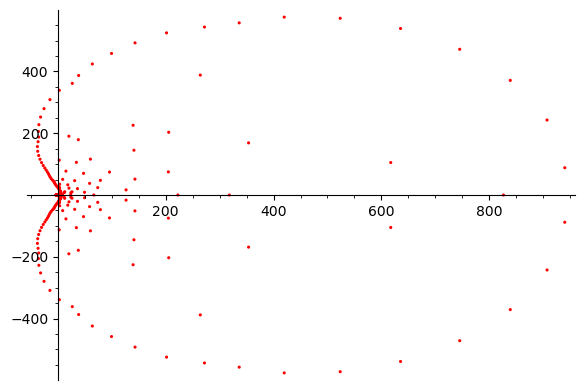

In [4]:
import pickle
rfile = open('/Users/barrybrent/6oct22.txt','rb') #HsubItoMminus2Strike polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
ls=len(s)
for k in [200..200]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        print("j: ",j)
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=5)
    show(rootplot)